In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy import signal

%matplotlib inline

font = {'family' : 'sans-serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

In [17]:
def fAdjustTime(sTimeStamp):
    x = sTimeStamp.split('.');
    fSecAdj = int(x[1]) * 10**-9;
    fReturnValue = float(x[0]) + fSecAdj;
    #print(fReturnValue)
    return(fReturnValue);

loc = 'C:/Users/MichaelDelph/Dropbox (Myomo Inc)/!Engineering/Project Files/Saturn/Designs/Behaviors/Position control/HBridge Current Eval/14AUG2020/'
sub_folder = '13AUG2020/'
loc = 'C:/Users/MichaelDelph/Dropbox (Myomo Inc)/!Engineering/Project Files/Saturn/Designs/Behaviors/Position control/HBridge Current Eval/17AUG2020/'
device_file_name = 'RampUpDown4'
device_file_name = 'Ramp Down'
device_file_name = 'RampUpDown5'
device_file_name = 'NoOsc_device_SM'
device_file_name = 'NoOsc_device_Exp2'
device_file_name = 'NoOsc_device_Exp2b'
device_file_name = 'Experiment3_device'
device_file_name = 'Experiment3b_device'
device_file_name = 'Experiment3c_device'
device_file_name = 'Exp3c_Test2_device'
device_file_name = 'Exp3c_Test4_bat3_device'
device_file_name = 'Exp3c_Test5_bat1_device'
device_file_name = 'Exp3c_bat2_device'
extnd = '.csv'
device_input_file   = loc + device_file_name  + ".txt"
device_output_file = loc +  device_file_name + "_Output" + extnd


inputFile = open(device_input_file, "r")
outputFile = open(device_output_file, "w")
  
count = 0;
while True:   
    # Get next line from file 
    line = inputFile.readline() 
    count=count+1;
    # if line is empty 
    # end of file is reached 
    if not line: 
        break
     
    if ((line[0]!='$') and (line[0]!='#')):
        line = line.replace("Therm_State: ", "");
        line = line.replace("AVGBatCurrent: ", "");
        line = line.replace("BatCurrent: ", "");
        line = line.replace("Motor_Input: ", "");
        line = line.replace("\t", "");
        line = line.replace(" ", "");
        #print("Line{}: {}".format(count, line.strip())) 
        splitLine = line.split(',');
        if (len(splitLine)>5):
            splitLine[0] = str(fAdjustTime(splitLine[0]))
            s = ",";
            line=s.join(splitLine)
#             print("Line{}:: {}".format(count, line.strip())) 
            outputFile.write(line)
  
inputFile.close() 
outputFile.close()


In [18]:
current_file_name = 'RampUpDown4_current'
current_file_name = 'Ramp Down Current'
current_file_name = 'RampUpDown5_Current'
current_file_name = '804080_Current_SM'
current_file_name = '804080_Current_Exp2'
# current_file_name = '804080_Current_Exp2b'
# current_file_name = 'Experiment3_Current'
# current_file_name = 'Experiment3b_Current'
# current_file_name = 'Experiment3c_Current'
current_file_name = 'Experiment3c_Test2_CurrevntandTemp'
current_file_name = 'Exp3c_Test4_bat3_current_thermal'
current_file_name = 'Exp3c_bat2_Current_Thermal'

thermal_file_name = 'RampUpDown4_Thermal'
thermal_file_name = 'RampDown'
thermal_file_name = 'RampUpDown5_Thermal'
thermal_file_name = '804040_Thermal_SM'
thermal_file_name = '804080_Thermal_Exp2'
# thermal_file_name = '804080_Thermal_Exp2b'
# thermal_file_name = 'Experiment3_thermal'
# thermal_file_name = 'Experiment3b_thermal'
# thermal_file_name = 'Experiment3c_thermal'

# device_file_name = 'RampUpDown5'
# device_file_name = 'NoOsc_device_SM'
# device_file_name = 'NoOsc_device_Exp2'
# # device_file_name = 'NoOsc_device_Exp2b'
# # device_file_name = 'Experiment3_device'
# # device_file_name = 'Experiment3b_device'


current_input_file  = loc + current_file_name + extnd

# thermal_input_file  = loc + thermal_file_name  + extnd

device_output_file = loc + device_file_name + "_Output" + extnd


df_raw_current = pd.read_csv(current_input_file, header=0, dtype=np.float64)
df_raw_device = pd.read_csv(device_output_file, header=0, dtype=np.float64)
# df_raw_thermal = pd.read_csv(thermal_input_file, header=0, dtype=np.float64)
print (df_raw_current.columns)
print (df_raw_device.columns)
# print (df_raw_thermal.columns)

###### Current File params########
t_current_hour = df_raw_current['hour'].values
t_current_min = df_raw_current['min'].values
t_current_sec = df_raw_current['sec'].values
# t_current = df_raw_current['time'].values

t_current = (t_current_hour*60) + t_current_min + (t_current_sec/60)

# t_current = t_current_min + (t_current_sec/60)
t_current = t_current - t_current[0]

motor_current = df_raw_current['current'].values

###### Device File Params ########

t_device = df_raw_device['time'].values
t_device = t_device - t_device[0]
t_device = t_device/60

PWM = df_raw_device['PWM'].values
# PWM = - PWM
SP = df_raw_device['SP'].values
pos = df_raw_device['Input'].values
bat_current = df_raw_device['bat_current'].values
mot_temp = df_raw_device['mot_temp'].values


###### Thermal File Params #######

# t_thermal = df_raw_thermal['time'].values
# t_thermal = t_thermal/60
# t_thermal_min = df_raw_thermal['min'].values
# t_thermal_sec = df_raw_thermal['sec'].values

# t_thermal = t_thermal_min + (t_thermal_sec/60)
# t_thermal = t_thermal - t_thermal[0]

# print(t_thermal)

HBridge_tmep = df_raw_current['Hbridge'].values
HBridge_tmep = (HBridge_tmep * 1.8) + 32
# Motor_temp = df_raw_current['Motor'].values
# Motor_temp = (Motor_temp * 1.8) + 32




highLim_bar = [160] * len(t_current)



# t = np.linspace(0, 14, len(PWM)) #Domain of EMG values 


Index(['hour', 'min', 'sec', 'current', 'Hbridge'], dtype='object')
Index(['time', 'SP', 'Input', 'PWM', 'mot_temp', 'bat_current'], dtype='object')


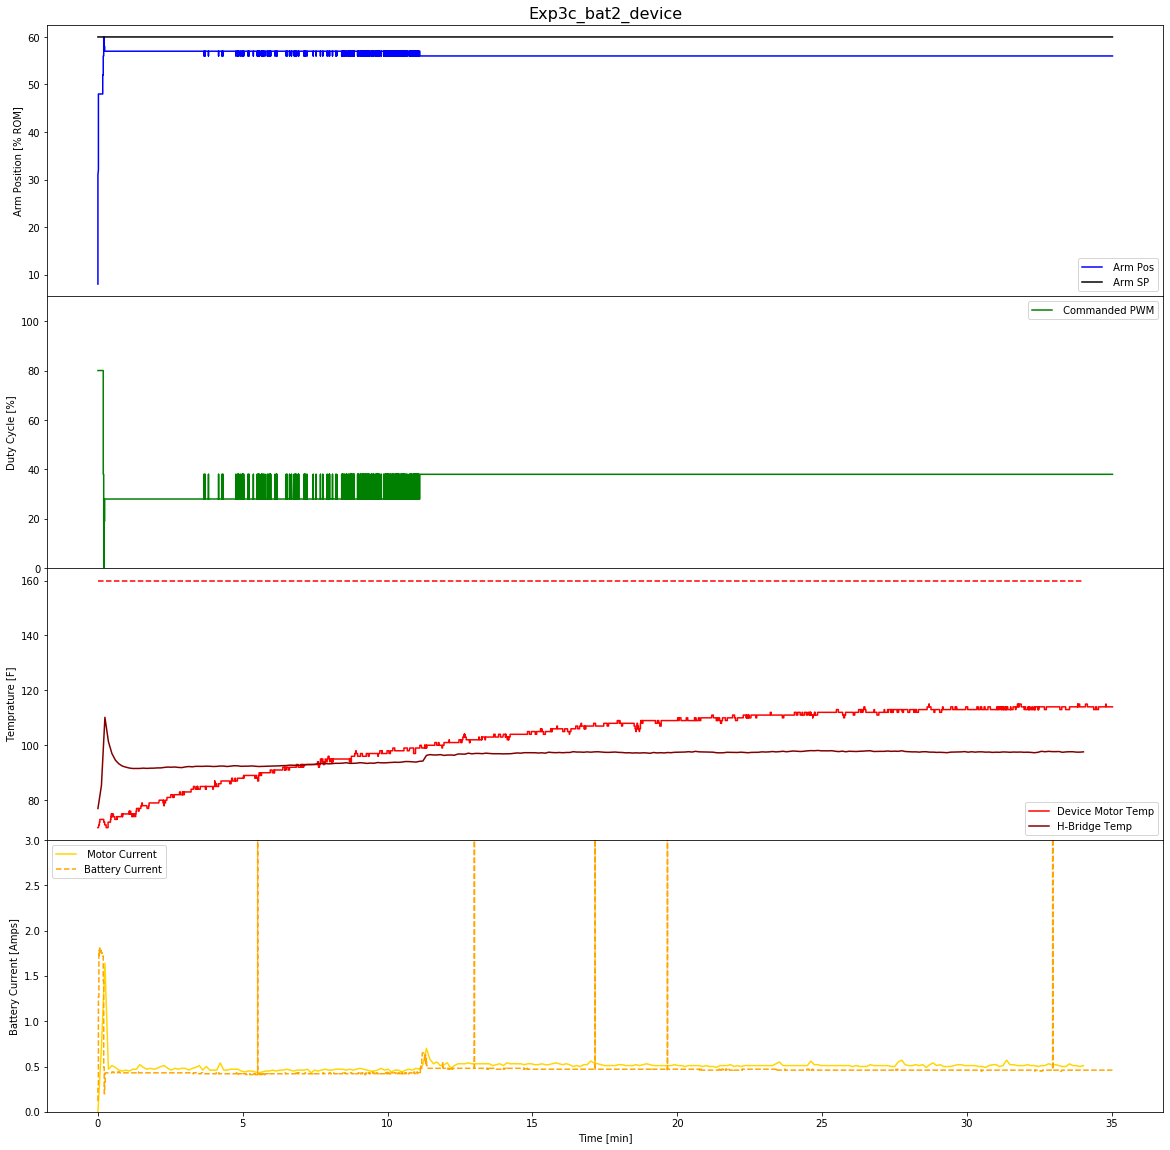

In [19]:
fig, axs = plt.subplots(4, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.set_figheight(20)
fig.set_figwidth(20)



axs[0].plot(t_device, pos , color = 'b', label = ' Arm Pos')
axs[0].plot(t_device, SP , color = 'k', label = ' Arm SP')
axs[0].set_ylabel('Arm Position [% ROM]')
axs[0].set_title(device_file_name, fontsize=16)
# axs[0].set_ylim(0, 70)
# axs[0].set_xlim(2.1,2.15)
axs[0].legend()

axs[1].plot(t_device,PWM , color = 'g', label = ' Commanded PWM')
axs[1].set_ylabel('Duty Cycle [%]')
# axs[1].set_title(device_file_name, fontsize=16)
axs[1].set_ylim(0, 110)
# axs[0].set_xlim(2.1,2.15)
axs[1].legend()

axs[2].plot(t_device, mot_temp, color = 'r',label = 'Device Motor Temp' )
axs[2].plot(t_current,HBridge_tmep, color = 'maroon', label = 'H-Bridge Temp' )
# axs[2].plot(t_current,Motor_temp, color = 'coral', label = 'External Motor Temp')
axs[2].plot(t_current,highLim_bar, '--r')
axs[2].set_ylabel('Temprature [F]')
# axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
# axs[1].set_ylim(0, 1)
axs[2].legend()


axs[3].plot(t_current, motor_current, color = 'gold', label = ' Motor Current')
axs[3].plot(t_device,bat_current, '--', color =  'orange', label = 'Battery Current')
axs[3].set_xlabel('Time [min]')
axs[3].set_ylabel('Battery Current [Amps]')
# axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[3].set_ylim(0, 3)
axs[3].legend()
